## Missing value imputation using ML model

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_excel('/Users/swaruptripathy/Desktop/Data Science and AI/datasets/stark_data.xlsx')

In [3]:
dataset.head()

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [4]:
dataset.shape

(6, 4)

In [5]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Character    6 non-null object
Age          5 non-null float64
Gender       6 non-null object
Survived     6 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 272.0+ bytes


In [6]:
#Check for null values
dataset.isnull()

,Character,Age,Gender,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,False,False,False


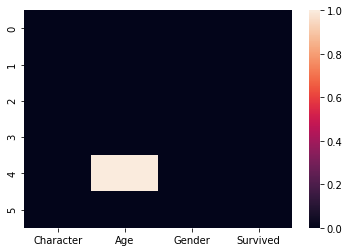

In [7]:
#Plot null values in seaborn
sb.heatmap(dataset.isnull())

In [8]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values
X[:,1:2]

array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [nan],
       [24.0]], dtype=object)

In [9]:
#Impute missing value using sklearn imputer from preprocessing
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(X[:, 1:2])
X[:, 1:2] = imputer.transform(X[:, 1:2]) #imputer.fit_transform()
X[:, 1:2]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [28.6],
       [24.0]], dtype=object)

In [10]:
X

array([['Eddard', 52.0, 'Male'],
       ['John', 27.0, 'Male'],
       ['Arya', 21.0, 'Female'],
       ['Bran', 19.0, 'Male'],
       ['Robb', 28.6, 'Male'],
       ['Sansa', 24.0, 'Female']], dtype=object)

In [11]:
help(Imputer)

Help on class Imputer in module sklearn.preprocessing.imputation:

class Imputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Imputer(*args, **kwargs)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <imputation>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : integer or "NaN", optional (default="NaN")
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For missing values encoded as np.nan,
 |      use the string value "NaN".
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        the axis.
 |      - If "median", then replace missing values using the median along
 |        the axis.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along the axis.
 |  
 |  axis : integer, optional (default=0)

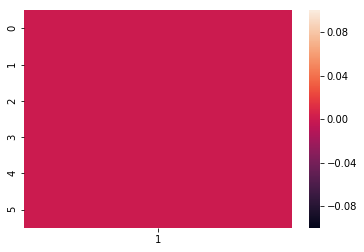

In [20]:
X_Age = pd.DataFrame(X[1])
sb.heatmap(X_Age.isnull())

In [21]:
X_Age

,1
0,52
1,27
2,21
3,19
4,28.6
5,24
